In [3]:
from sympy import *

In [4]:
U_o, U_1, I_1, I_2 = symbols("U_o U_1 I_1 I_2")
# linsolve(["U_1 + U_o/(I*w*C*R_2) ", "U_1 - I_1/(I*w*C)-U_o", "R(I_1 - U_o/R_2) + U_1*(R/r + 1)-U_i"], U_o, U_1, 'I_1')

In [5]:
220e-9*5e3*6*2e3

13.2

In [6]:
w, C_1, C_2, k, R_2, U_i, R, r = symbols("w C_1 C_2 k R_2 U_i R r", real=True, positive=True)
k = symbols("k")

a = Matrix([[1, 1/(I*w*C_1), 0,  -1, 0],
           [0, 0, 1/(I*w*C_2), -1, 0],
           [0, R, R, R/r + 1, U_i],
           [1, 0, R_2, 0, 0]])
linsolve(a, U_o, I_1, I_2, U_1)

{(I*C_2*R_2*U_i*r*w/(C_1*C_2*R*R_2*r*w**2 - I*C_1*R*r*w - I*C_2*R*r*w - R - r), (C_1*C_2*R_2*U_i*r*w**2 - I*C_1*U_i*r*w)/(C_1*C_2*R*R_2*r*w**2 - I*C_1*R*r*w - I*C_2*R*r*w - R - r), -I*C_2*U_i*r*w/(C_1*C_2*R*R_2*r*w**2 - I*C_1*R*r*w - I*C_2*R*r*w - R - r), -U_i*r/(C_1*C_2*R*R_2*r*w**2 - I*C_1*R*r*w - I*C_2*R*r*w - R - r))}

In [7]:
OUT = list(linsolve(a, U_o, I_1, I_2, U_1))[0][0]

In [27]:
OUT

I*C_2*R_2*U_i*r*w/(C_1*C_2*R*R_2*r*w**2 - I*C_1*R*r*w - I*C_2*R*r*w - R - r)

In [31]:
simplify(abs(OUT), ratio=0.0)

C_2*R_2*U_i*r*w/sqrt(C_1**2*C_2**2*R**2*R_2**2*r**2*w**4 + C_1**2*R**2*r**2*w**2 - 2*C_1*C_2*R**2*R_2*r*w**2 + 2*C_1*C_2*R**2*r**2*w**2 - 2*C_1*C_2*R*R_2*r**2*w**2 + C_2**2*R**2*r**2*w**2 + R**2 + 2*R*r + r**2)

In [32]:
print(latex(OUT))

\frac{i C_{2} R_{2} U_{i} r w}{C_{1} C_{2} R R_{2} r w^{2} - i C_{1} R r w - i C_{2} R r w - R - r}


In [12]:
print(latex(a))

\left[\begin{matrix}1 & - \frac{i}{C_{1} w} & 0 & -1 & 0\\0 & 0 & - \frac{i}{C_{2} w} & -1 & 0\\0 & R & R & \frac{R}{r} + 1 & U_{i}\\1 & 0 & R_{2} & 0 & 0\end{matrix}\right]


In [15]:
R = 1e3
R2 = 2e3
C1 = C2 = 220e-9
r = 12
U1 = 1.0

In [16]:
def U(ν):
    w = 2*3.1415*ν
    return C2*R2*U1*r*w/((-C1*C2*R*R2*r*w**2 + R + r)**2 + (C1 + C2)**2*R**2*r**2*w**2)**0.5

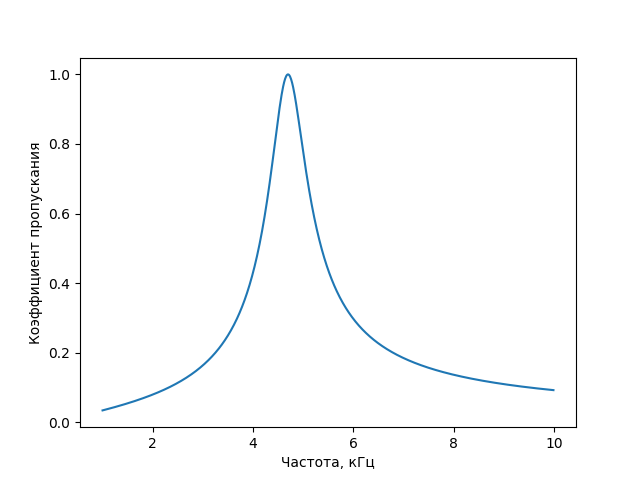

In [20]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
ν = np.arange(1_000, 10_000, 10)

plt.plot(ν/1e3, U(ν))
#plt.loglog()
plt.xlabel("Частота, кГц")
plt.ylabel("Коэффициент пропускания")

plt.savefig("../img/FR_theory.png", dpi=300)
